# Скачиваем датасет LogoDet-3k с kaggle

In [2]:
!kaggle datasets download -d lyly99/logodet3k

Dataset URL: https://www.kaggle.com/datasets/lyly99/logodet3k
License(s): unknown
100% 2.87G/2.87G [01:35<00:00, 42.6MB/s]
100% 2.87G/2.87G [01:35<00:00, 32.4MB/s]


In [4]:
# !unzip logodet3k.zip

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Подготовка данных к обучению и нормализация

In [2]:
data_dir = 'LogoDet-3K'

batch_size = 32
img_height = 180
img_width = 180

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 158654 files belonging to 9 classes.
Using 126924 files for training.
Found 158654 files belonging to 9 classes.
Using 31730 files for validation.


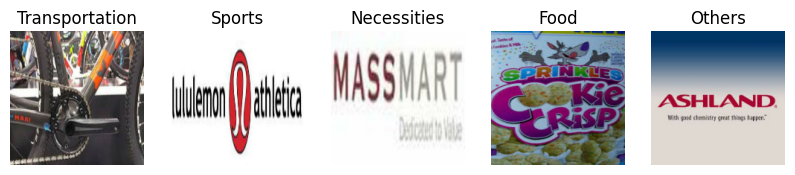

In [3]:
import matplotlib.pyplot as plt

def plot_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(dataset.class_names[labels[i]])
            plt.axis("off")
    plt.show()

plot_images(val_ds, num_images=5)

In [4]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 257s 63ms/step - accuracy: 0.4005 - loss: 1.7478 - val_accuracy: 0.4867 - val_loss: 1.4840
Epoch 2/5
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 209s 51ms/step - accuracy: 0.4982 - loss: 1.4563 - val_accuracy: 0.5809 - val_loss: 1.2676
Epoch 3/5
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 250s 48ms/step - accuracy: 0.6330 - loss: 1.0815 - val_accuracy: 0.6555 - val_loss: 1.1364
Epoch 4/5
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 197s 50ms/step - accuracy: 0.7482 - loss: 0.7537 - val_accuracy: 0.6902 - val_loss: 1.1088
Epoch 5/5
3967/3967 ━━━━━━━━━━━━━━━━━━━━ 197s 48ms/step - accuracy: 0.8212 - loss: 0.5431 - val_accuracy: 0.7177 - val_loss: 1.1349


# Оценка

In [6]:
loss, accuracy = model.evaluate(val_ds)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

992/992 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.7168 - loss: 1.1419
Loss: 1.1348720788955688
Accuracy: 0.7176804542541504


# Сохранение модели в формате HDF5 и Keras

In [7]:
model.save('logo_model.h5')
model.save('logo_model.keras')

# Итог:
В результате я получил 71% точности и на самом деле меня бы устроило 50% и больше, так как из сохраненной модели мы возьмем свёрточные слои и избавимся от полносвязных как в Transfer Learning.

Можно было бы сделать сеть больше, поменять функции активации, обучить на бóльшем количестве эпох, посмотреть TensorBoard, чтобы понять как идет обучение и т.д или в конце концов применить аугментацию изображений, чтобы сеть научилась искать трудноразличимые связи(вообще желательно это было сделать так как сверточные слои легче бы обобщали сложные связи).